E-Commerce Data Analysis

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [21]:
data_frame = pd.read_csv("ecommerce.csv")

In [22]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            250000 non-null  int64  
 1   Purchase Date          250000 non-null  object 
 2   Product Category       250000 non-null  object 
 3   Product Price          250000 non-null  int64  
 4   Quantity               250000 non-null  int64  
 5   Total Purchase Amount  250000 non-null  int64  
 6   Payment Method         250000 non-null  object 
 7   Customer Age           250000 non-null  int64  
 8   Returns                202618 non-null  float64
 9   Customer Name          250000 non-null  object 
 10  Age                    250000 non-null  int64  
 11  Gender                 250000 non-null  object 
 12  Churn                  250000 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 24.8+ MB


In [23]:
data_frame.dtypes

Customer ID                int64
Purchase Date             object
Product Category          object
Product Price              int64
Quantity                   int64
Total Purchase Amount      int64
Payment Method            object
Customer Age               int64
Returns                  float64
Customer Name             object
Age                        int64
Gender                    object
Churn                      int64
dtype: object

In [24]:
data_frame["Gender"]

0         Female
1         Female
2         Female
3         Female
4         Female
           ...  
249995      Male
249996    Female
249997    Female
249998      Male
249999      Male
Name: Gender, Length: 250000, dtype: object

In [25]:
data_frame["Gender"].isnull().sum()

0

In [26]:
data_frame["Gender"].value_counts()

Gender
Male      125676
Female    124324
Name: count, dtype: int64

In [27]:
gender_count = data_frame["Gender"].value_counts()

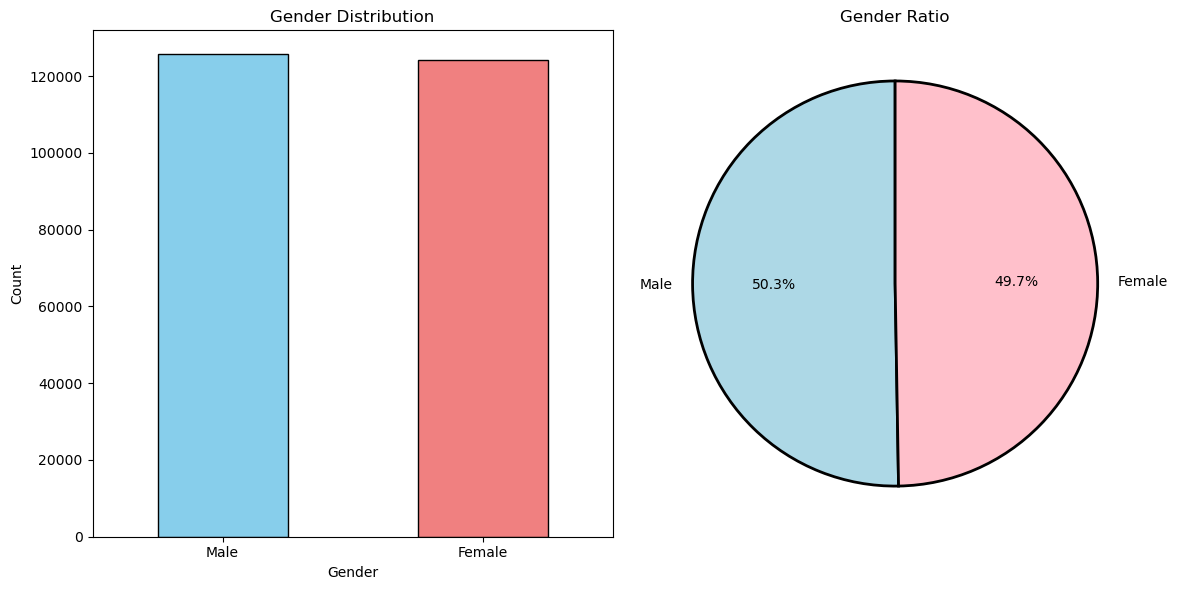

In [43]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

gender_count.plot(kind='bar', color=['skyblue', 'lightcoral'], ax=axes[0],edgecolor='black', linewidth=1.0)
ax=axes[0].set_title("Gender Distribution")
ax=axes[0].set_xlabel("Gender")
ax=axes[0].set_ylabel("Count")
axes[0].tick_params(axis='x', rotation=0)


gender_count.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightblue', 'pink'],ax=axes[1])
axes[1].set_title('Gender Ratio')
axes[1].set_ylabel('')
axes[1].wedgeprops={'edgecolor': 'black', 'linewidth': 2}
for wedge in axes[1].patches:
    wedge.set_edgecolor('black')
    wedge.set_linewidth(2)


plt.tight_layout()
plt.show()

In [44]:
data_frame["Payment Method"].isnull().sum()

0

In [45]:
data_frame["Payment Method"].unique()

array(['PayPal', 'Credit Card', 'Cash'], dtype=object)

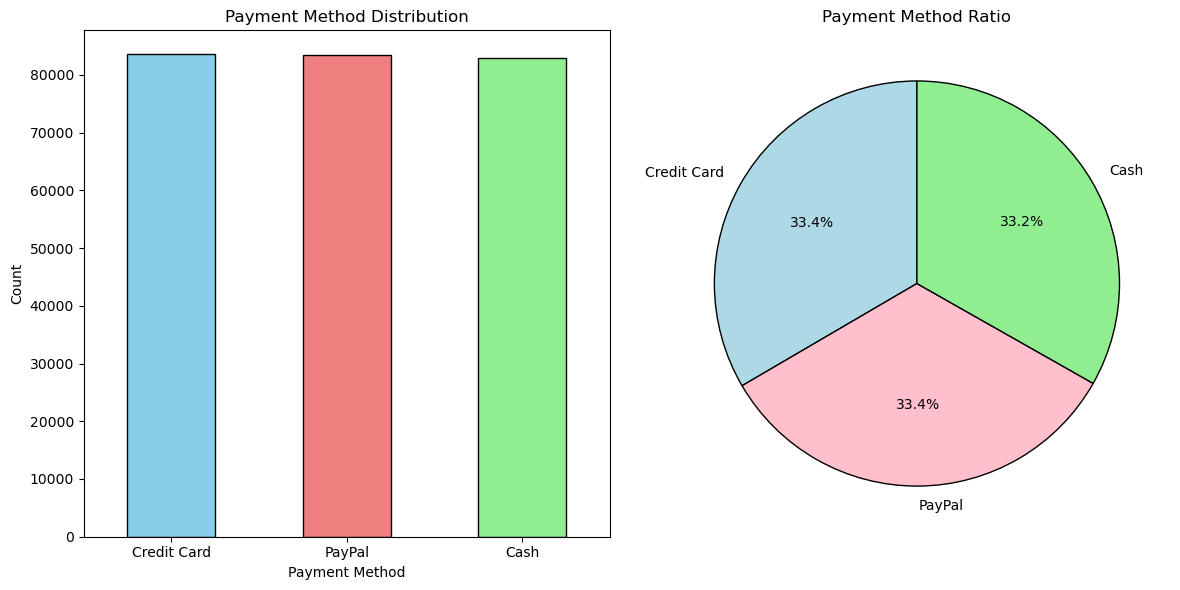

In [62]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
payment_count = data_frame["Payment Method"].value_counts()

payment_count.plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen'], ax=axes[0], edgecolor='black', linewidth=1.0)
axes[0].set_title("Payment Method Distribution")
axes[0].set_xlabel("Payment Method")
axes[0].set_ylabel("Count")
axes[0].tick_params(axis='x', rotation=0)

payment_count.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightblue', 'pink', 'lightgreen'], ax=axes[1])
axes[1].set_title('Payment Method Ratio')
axes[1].set_ylabel('')

for wedge in axes[1].patches:
    wedge.set_edgecolor('black')
    wedge.set_linewidth(1)

plt.tight_layout()
plt.show()

In [54]:
data_frame["Product Category"].isnull().sum()

0

In [ ]:
# Replot with refined styling: thinner bars and larger category labels

category_sales = data_frame.groupby('Product Category')['Quantity'].sum().reset_index()
category_sales = category_sales.sort_values('Quantity', ascending=True)


C:\Users\Ashu\AppData\Local\Temp\ipykernel_26328\2872217525.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(
C:\Users\Ashu\AppData\Local\Temp\ipykernel_26328\2872217525.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  barplot.set_yticklabels(barplot.get_yticklabels(), fontsize=14, weight='bold')


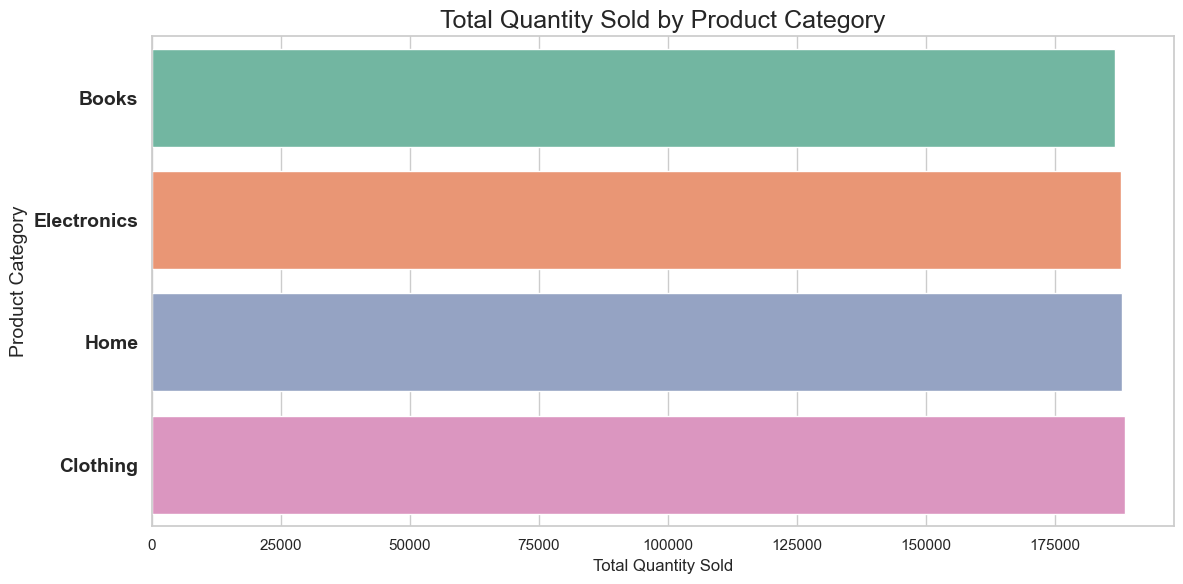

In [82]:
plt.figure(figsize=(12, 6))
sns.set(style='whitegrid')

barplot = sns.barplot(
    data=category_sales,
    x='Quantity',
    y='Product Category',
    palette='Set2'
)


barplot.set_yticklabels(barplot.get_yticklabels(), fontsize=14, weight='bold')
plt.xlabel('Total Quantity Sold', fontsize=12)
plt.ylabel('Product Category', fontsize=14)

plt.title('Total Quantity Sold by Product Category', fontsize=18)

plt.tight_layout()
plt.show()
